In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
dcf_sim = pd.read_csv('simulation_results.csv')
dcf_sim_2 = pd.read_csv('simulation_results1.csv')
dcf_sim_3 = pd.read_csv('simulation_results2.csv')

dcf_rogue_1 = pd.read_csv('simulation_results_rogue_node1.csv')
dcf_rogue_2 = pd.read_csv('simulation_results_rogue_node2.csv')
dcf_rogue_3 = pd.read_csv('simulation_results_rogue_node3.csv')
dcf_rogue_4 = pd.read_csv('simulation_results_rogue_node4.csv')
dcf_rogue_5 = pd.read_csv('simulation_results_rogue_node5.csv')

In [5]:
dcf_sim.drop('Unnamed: 0', axis=1, inplace=True)
dcf_sim_2.drop('Unnamed: 0', axis=1, inplace=True)
dcf_sim_3.drop('Unnamed: 0', axis=1, inplace=True)

dcf_rogue_1.drop('Unnamed: 0', axis=1, inplace=True)
dcf_rogue_2.drop('Unnamed: 0', axis=1, inplace=True)
dcf_rogue_3.drop('Unnamed: 0', axis=1, inplace=True)
dcf_rogue_4.drop('Unnamed: 0', axis=1, inplace=True)
dcf_rogue_5.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
dcf_sim['Label'] = 0
dcf_sim_2['Label'] = 0
dcf_sim_3['Label'] = 0

dcf_rogue_1['Label'] = 1
dcf_rogue_2['Label'] = 1
dcf_rogue_3['Label'] = 1
dcf_rogue_4['Label'] = 1
dcf_rogue_5['Label'] = 1

In [7]:
joined_table = pd.concat([dcf_sim, dcf_sim_2, dcf_sim_3, dcf_rogue_1, dcf_rogue_2, dcf_rogue_3, dcf_rogue_4, dcf_rogue_5])
joined_table.reset_index(inplace=True)
joined_table.tail()

,index,number of nodes,collision probability,total throughput,average delay,simulation time,dropped packet,Label
460,50,56,0.681999,1.660711e+07,0.056353,29.780829,2941.0,1
461,51,57,0.684166,1.652250e+07,0.058384,29.772801,3068.0,1
462,52,58,0.686504,1.649452e+07,0.059670,29.800602,3108.0,1
463,53,59,0.688645,1.639478e+07,0.059487,29.697597,3126.0,1
464,54,60,0.690916,1.630497e+07,0.061609,29.792241,3183.0,1


In [8]:
joined_table.drop('index', inplace=True, axis=1)

In [9]:
feature_cols = ['number of nodes', 'collision probability', 'total throughput', 'average delay']

In [10]:
X = joined_table[feature_cols]
y = joined_table['Label']

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [177]:
from sklearn.preprocessing import StandardScaler

scl_x = StandardScaler()

In [178]:
X_train = scl_x.fit_transform(X_train)
X_test = scl_x.transform(X_test)

In [179]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [180]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [181]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m])

In [182]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
33/33 [==============================] - 2s 15ms/step - loss: 0.6914 - accuracy: 0.6246 - recall_m: 0.9939 - precision_m: 0.6150 - val_loss: 0.6989 - val_accuracy: 0.6143 - val_recall_m: 1.0000 - val_precision_m: 0.6143
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6123 - recall_m: 1.0000 - precision_m: 0.6121 - val_loss: 0.6655 - val_accuracy: 0.6143 - val_recall_m: 1.0000 - val_precision_m: 0.6143
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.6123 - recall_m: 1.0000 - precision_m: 0.6182 - val_loss: 0.6278 - val_accuracy: 0.6143 - val_recall_m: 1.0000 - val_precision_m: 0.6143
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.6123 - recall_m: 1.0000 - precision_m: 0.6121 - val_loss: 0.6073 - val_accuracy: 0.6143 - val_recall_m: 1.0000 - val_precision_m: 0.6143
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.

33/33 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9538 - recall_m: 0.9273 - precision_m: 1.0000 - val_loss: 0.1970 - val_accuracy: 0.9714 - val_recall_m: 0.9571 - val_precision_m: 1.0000
Epoch 37/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9600 - recall_m: 0.9337 - precision_m: 1.0000 - val_loss: 0.1941 - val_accuracy: 0.9571 - val_recall_m: 0.9332 - val_precision_m: 1.0000
Epoch 38/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1800 - accuracy: 0.9662 - recall_m: 0.9508 - precision_m: 1.0000 - val_loss: 0.1906 - val_accuracy: 0.9571 - val_recall_m: 0.9332 - val_precision_m: 1.0000
Epoch 39/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.9569 - recall_m: 0.9253 - precision_m: 1.0000 - val_loss: 0.1832 - val_accuracy: 0.9714 - val_recall_m: 0.9571 - val_precision_m: 1.0000
Epoch 40/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1701 - ac

33/33 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9723 - recall_m: 0.9591 - precision_m: 1.0000 - val_loss: 0.1115 - val_accuracy: 0.9571 - val_recall_m: 0.9372 - val_precision_m: 1.0000
Epoch 72/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9692 - recall_m: 0.9470 - precision_m: 1.0000 - val_loss: 0.1108 - val_accuracy: 0.9571 - val_recall_m: 0.9372 - val_precision_m: 1.0000
Epoch 73/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9785 - recall_m: 0.9746 - precision_m: 0.9962 - val_loss: 0.1111 - val_accuracy: 0.9571 - val_recall_m: 0.9372 - val_precision_m: 1.0000
Epoch 74/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9723 - recall_m: 0.9565 - precision_m: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9571 - val_recall_m: 0.9372 - val_precision_m: 1.0000
Epoch 75/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0846 - ac

In [183]:
_, accuracy, recall, precision = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9571 - recall_m: 0.9467 - precision_m: 1.0000


In [184]:
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))

Accuracy: 95.71
Recall: 94.67
Precision: 100.00


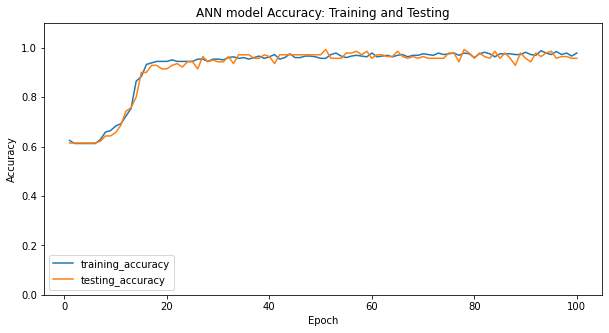

In [185]:
epochs = range(1, len(history.history[i]) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.ylim(0,1.1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN model Accuracy: Training and Testing')
plt.legend(['training_accuracy', 'testing_accuracy'])
plt.show()

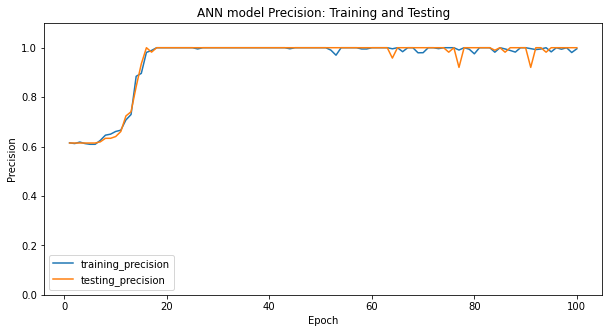

In [186]:
plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['precision_m'])
plt.plot(epochs, history.history['val_precision_m'])
plt.legend(['training_precision', 'testing_precision'])
plt.ylim(0,1.1)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('ANN model Precision: Training and Testing')
plt.show()

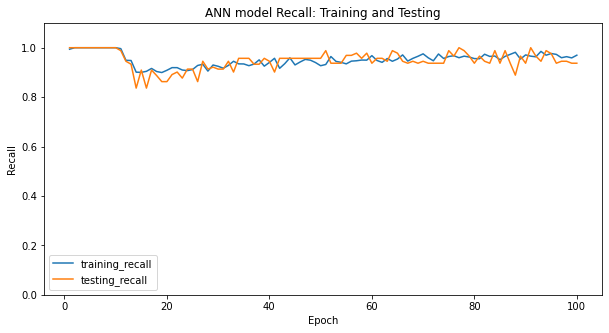

In [187]:
plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['recall_m'])
plt.plot(epochs, history.history['val_recall_m'])
plt.legend(['training_recall', 'testing_recall'])
plt.ylim(0,1.1)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('ANN model Recall: Training and Testing')
plt.show()